## Finding Unique Patterns in Dialysis Facilities with Patients' Data using Unsupervised learning algorithms

Capstone project for Data Science Career Track bootcamp

Benhur Tedros

## Summary

Kidney failure (ESRD: end stage renal disease) is one of the leading cause of death in the United States. According to USRDS 2013 Annual data report, this disease affects almost 650,000 people per year in US, and its rate is increasing by 5% each year. Today, ESRD patients have two treament options, which are either kidney transplantation or dialysis. The best current treament is the transplantation; however, the number of kidney donors to ESRD patients ratio is 1 to 6. Moreover, the need for kidney is increasing at 8% per year while their availability has not grown to match up that number. Therefore, dialysis is the only alternative option that the patients on waiting list have. People undergoing dialysis often have multiple health concerns,which can have an adverse impact on their life expectancy, though dialysis may offer a better quality of life. According to the National Institute of Diabetes and Digestive and Kidney Diseases report, the two-year, five year and ten-year survival rates are around 64%, 33%, and 10% respectively. The survival or mortality rate varies from one dialysis facility to another. In light of this, "could we find groups of dialysis facilities with similar behaviour given a dataset of the patients' health records that have been collected during their visits?" For example, would the effect be better if the facility use hemodialysis for patient A and peritoneal dialysis for patient B or vice versa.

There are several dialysis facilities registered with Medicare in the country where patients often visit. Besides the importance of the quality of care they provide, additional health data of their patients is collected. Some of the data include mortality rate (deaths), hospitalizations, blood transfusions, incidents of hypercalcemia (too much calcium in the blood), percentage of waste removed during hemodialysis in adults and children, percentage of waste removed in adults during peritoneal dialysis, percentage of AV fistulas, percentage of catheters in use over 90 days and others. 

This capstone project will try to find a meaningful pattern within the health data of the patients and cluster the facilities with similar behaviour into groups. The result of this work will primarily help the dialysis facilities to improve their services.

## Objective of this project

The goal of this capstone project is:
+ Organize the dialysis facilities into groups in which the facilities in each cluster are similar in some way
+ Understand the type of practices used in the facilities within different States

## Data

The data for this project was publised by Centers for Medicare & Medicaid Services and was downloaded from the DATA.MEDICARE.GOV. The dataset is comprised of data on anemia management, phosphorus levels, transfusion rate, dialysis adequacy, vascular access, mineral and bone disorder, hospitalization rate, readmission rate,infection ratio, scale rate of the facility and others.The data was collected from 2012 to 2015 and can be downloaded from:
    
        https://data.medicare.gov/Dialysis-Facility-Compare/Dialysis-Facility-Compare-Listing-by-Facility/23ew-n7w9/data
        
The details of the data fields with their term definitions can be found at the following link by clicking the " get supporting documents tab":

        https://data.medicare.gov/data/dialysis-facility-compare
        
Two additional dataset were also used to merge with the original one. The first dataset includes population size for each counties, and the second one has an information on household income based on counties. The dataset were downloaded from the websites which are hyperlinked below.

        https://www.census.gov/data/datasets/2016/demo/popest/counties-detail.html
        
        https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income

## Methods/Approach

This project will be treated as unsupervised learning classification problem. Data loading, data wrangling and cleaning, feature selection, exploratory data analysis, inferential statistics, matrix manipulation, data visualization, clustering, model evaluation were carried out one after another to achieve the objectives of the project.The libraries used in this project include numpy, pandas, matplotlib, scikit-learn and Seaborn.


## I) Data Wrangling and Cleaning

The dataset are stored in MS Excel spreadsheet in CSV format, which were easily loaded into pandas dataframes. Several components of data wrangling were utilized to make the dataset ready to be used for analysis and prediction. The dataset was originally in the format of CSV and loaded to the python notebook. It contains 6810 observations with 98 data fields with some missing/null values. Many of the names of the data fields were too long and were shortened for our convenience. The dataset was subset into fewer data fields/features depending on their scalability nature and importance to our prediction. Some of the columns in the dataset contained categorical variables, but were converted into numerical nature in order to get them included in the analysis. As this dataset was short of information on population size and household income in each county where the dialysis facilities are located, two additional dataset with the same data were merged to the original dataset before conducting the exploratory data analysis.

In [1]:
# Importing the required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os

In [2]:
# Setting up the path directory
os.chdir('F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone Project')
os.getcwd()

'F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone Project'

In [3]:
# Loading the csv datafile into pandas dataframes
data = pd.read_csv('Dialysis_Mortality.csv')

# Getting information on the data fields, attributes,data types,field names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 98 columns):
Provider Number                                                                              6810 non-null object
Network                                                                                      6810 non-null int64
Facility Name                                                                                6810 non-null object
Five Star Date                                                                               6810 non-null object
Five Star                                                                                    6017 non-null float64
Five Star Data Availability Code                                                             6810 non-null int64
Address Line 1                                                                               6810 non-null object
Address Line 2                                                                               101

## II) Feature Selection

The dataset has 6810 observations with 98 data fields with some null valuesdataset and contains some non-scalable and categorical variables/ non-numerical labels. The non-scalable data fields were dropped, and the others with the categorical variables were converted into numerical variables in order not to miss important information from those attributes. 

Twenty nine data fields/features were selected to be utilized in the model prediction.

In [4]:
# Subsetting the features needed for the prediction
feature_select= pd.DataFrame(data.iloc[:,[1,2,4,9,11,13,14,16,17,18,19,20,25,27,33,44,46,53,57,58,59,60,61,74,77,80,87,91,94]])

In [5]:
# Rename some of the features for convenience
features_all = feature_select.rename(columns = {'Facility Name':'facility_name','Profit or Non-Profit':'Profit_YesNo','Five Star':'five_star','# of Dialysis Stations':'Dial_Stations','Offers in-center hemodialysis':'hemodial_incenter',
                                      'Offers in-center peritoneal dialysis':'perit_incenter','Offers home hemodialysis training':'hemoTrain_home','Chain Owned':'chain_owned','Late Shift':'late_shift',
                                      'Percentage of Medicare patients with Hgb<10 g/dL':'Medicare_Patient_Hgb<10','Percentage of Medicare patients with Hgb>12 g/dL':
                                      'Medicare_Patient_Hgb>12','Percent of Adult HD patients with Kt/V >= 1.2':'HD_Patient_Kt/V >= 1.2','Percentage of Pediatric HD patients with Kt/V >= 1.2':
                                      'HD_Pediatric_Kt/V >= 1.2','Percentage of patients with arteriovenous fistulae in use':'Pat_AV_fistulae',
                                      'Percentage of patients with vascular catheter in use for 90 days or longer':'Pat_Vasc-Catheter_90days',
                                      'Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)':'Pat_hypercalcemia',
                                      'Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL':'SerumPhos_<3.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL':'SerumPhos_3.5-4.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL':'SerumPhos_4.6-5.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL':'SerumPhos_5.6-7.0mg/dL',
                                      'Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL':'SerumPhos_>7.0mg/dL',
                                      'Mortality Rate (Facility)':'Mortality_rate', 'Readmission Rate (Facility)':'Readmission_rate',                                     
                                      'Hospitalization Rate (Facility)':'Hospitalization_rate',
                                      'Percentage of adult PD patients with Kt/V>=1.7':
                                      'PD_Pat_Kt/V>=1.7','Standard Infection Ratio':'Infection_ratio','Transfusion Rate (Facility)':'Transfusion_rate'})                                                 

In [6]:
# regrouping the columns to line up the predictor variables together and 
# move the facility name to the first column

# To get a list of columns
cols = list(features_all)

# To move the column to last of columns' list
cols.insert(0, cols.pop(cols.index('facility_name')))


# To reorder the columns
features_all = features_all.ix[:, cols]

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if sys.path[0] == '':


In [7]:
from sklearn.preprocessing import LabelEncoder

# To convert the categorical inputs of some data fields to numerical nature

numeric = LabelEncoder()
features_all['Profit_YesNo']=numeric.fit_transform(features_all['Profit_YesNo'].astype('str'))
features_all['chain_owned']=numeric.fit_transform(features_all['chain_owned'].astype('str'))
features_all['late_shift']=numeric.fit_transform(features_all['late_shift'].astype('str'))
features_all['hemodial_incenter']=numeric.fit_transform(features_all['hemodial_incenter'].astype('str'))
features_all['perit_incenter']=numeric.fit_transform(features_all['perit_incenter'].astype('str'))
features_all['hemoTrain_home']=numeric.fit_transform(features_all['hemoTrain_home'].astype('str'))


In [8]:
# Some of the features contain a "%" symbol, which has to be cleaned.
# Getting rid off the % symbol from the respective columns

features_all[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2',
              'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']] \
= features_all[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2',
                'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']]\
              .replace('%','',regex=True).astype('float')

Two additional dataset named as "Population_county" and "Income_county" were merged to the original dataset (Dialysis_Mortality) based on State and county data fields, as both could be valuable datafields for our analysis, . The next three cells show the merging and cleaning steps.

In [9]:
#Loading county based population size dataset

pop_county= pd.read_csv('Population_county.csv',encoding='latin-1')

# Selecting the total population size as of recent estimate(2016) and for all ages together

pop_county = pop_county.loc[(pop_county['YEAR'] == 9) & (pop_county['AGEGRP'] == 0), :]

# Slicing the dataset based on County and State, as the county with the same name may exist in different states.

pop_county = pop_county.groupby(['County','State'],as_index=False).sum()

# Before merging the datasets, the county names used in both data frames should be the same.
# To fulfill that, all are converted to upper case, and any space within two words county name were deleted

pop_county['County']=pop_county['County'].str.upper()
pop_county['County']=pop_county['County'].str.replace('\s+', '')
features_all['County']=features_all['County'].str.replace('\s+', '')

# Merging the population table with the mortality table based on county and state
mort_pop = pd.merge(features_all, pop_county, how='left',on=['County','State'])

# Moving the county and state to the front columns

c=list(mort_pop)
c.insert(1, c.pop(c.index('County')))
c.insert(2, c.pop(c.index('State')))

mort_pop =mort_pop.ix[:,c]


C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [10]:
#Loading county based income dataset
income_county = pd.read_csv('Income_County.csv',encoding='latin-1')

# Listing the states' name with its abbreviations
state = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California','CO': 'Colorado',
        'CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','GU': 'Guam','HI': 'Hawaii',
        'IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts',
        'MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi',
        'MT': 'Montana','NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire',
        'NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon',
        'PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee',
        'TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin',
        'WV': 'West Virginia','WY': 'Wyoming'}

# Adding the abbreviations to the datasets
state= {State: abbrev for abbrev, State in state.items()}
income_county['State'] = income_county['State'].map(state)

# Converting the county name into uppercase letters, and any spaces between two worded county name has been omitted.
income_county['County'] = income_county['County'].str.upper()
income_county['County']=income_county['County'].str.replace('\s+', '')

# Merging the income info with the mortality table based on county and state
mort_popIncome = pd.merge(mort_pop, income_county,how='left',on=['County','State'])

# Dropping population variable from the dataset, as we already have a population feature added from the other dataset
total_mortRate = mort_popIncome.loc[:,mort_popIncome.columns!='Population']

#converting the features with a string type into the categorical inputs
total_mortRate['County']=numeric.fit_transform(total_mortRate['County'].astype('str'))

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
# move the five_star to the last column for convience
co=list(mort_pop)
co.insert(49, co.pop(co.index('five_star')))
total_mortRate =total_mortRate.ix[:,co]

total_mortRate.info()

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6810 entries, 0 to 6809
Data columns (total 47 columns):
facility_name               6810 non-null object
County                      6810 non-null int64
State                       6810 non-null object
Network                     6810 non-null int64
Profit_YesNo                6810 non-null int64
chain_owned                 6810 non-null int64
late_shift                  6810 non-null int64
Dial_Stations               6810 non-null int64
hemodial_incenter           6810 non-null int64
perit_incenter              6810 non-null int64
hemoTrain_home              6810 non-null int64
Medicare_Patient_Hgb<10     5952 non-null float64
Medicare_Patient_Hgb>12     5952 non-null float64
HD_Patient_Kt/V >= 1.2      6066 non-null float64
Pat_AV_fistulae             6149 non-null float64
Pat_Vasc-Catheter_90days    6149 non-null float64
Pat_hypercalcemia           6412 non-null float64
SerumPhos_<3.5mg/dL         6376 non-null float64
SerumPhos_3.5

The dataset was cleaned and subset to 6810 observations and 47 data fields, and the dataset is now ready for exploration and data analysis.

### III) Explaratory data Analysis (EDA) and Inferential Statistics

Explaratory data analysis for this dataset is useful in determining relationships among the explanatory variables, preliminary selection of appropriate models and assessing the direction and rough size of relationships between explanatory and outcome variables. This section will try to answer if there is a significance in terms of explaining unique pattern among the features given the health data of patients in the dialysis facilities across the States. Moreover, are there strong correlations between pairs of facilities or states? Before hand, it is vital to explore the distribution of the some of the features such as Mortality_rate, five_star (which is 1-5 scale reviews for the facilities) across the States. The mean and median of the Mortality_rate and five_star variables across the States will be explored. This will help us to explore the variations and similarities among the dialysis facilities with the same or different States.

#### Hypothesis:

Some of the health data such as readmission, hospitalization, standard infection rates are believed to show a strong positive correlations to the Mortality_rate. Moreover, patients with arteriovenous_fistulae has a lower risk of infection than patients with catheters, and so does their Mortality_rate. Therefore, exploring mortality rate across each States is vital,which is believed to show some trend. The five_star variable is also expected to display some variations.

Null Hypothesis, 
- Ho: There is no correlation between the pairs of dialysis facilities across the States given the health data of patients in the dialysis facilities across the States.

Alternative Hypothesis, 
- Ha:There is correlation between the pairs of the dialysis facilities

This hypothesis will be tested in this section.

In [12]:
# Loading the necessary python packages
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
from scipy.stats import norm

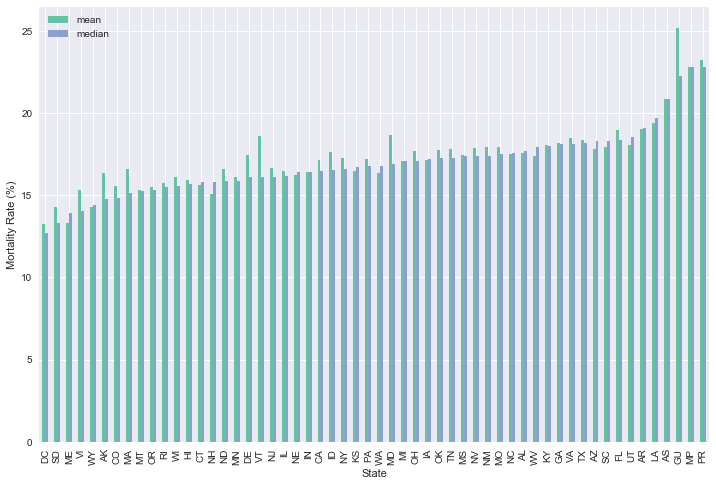

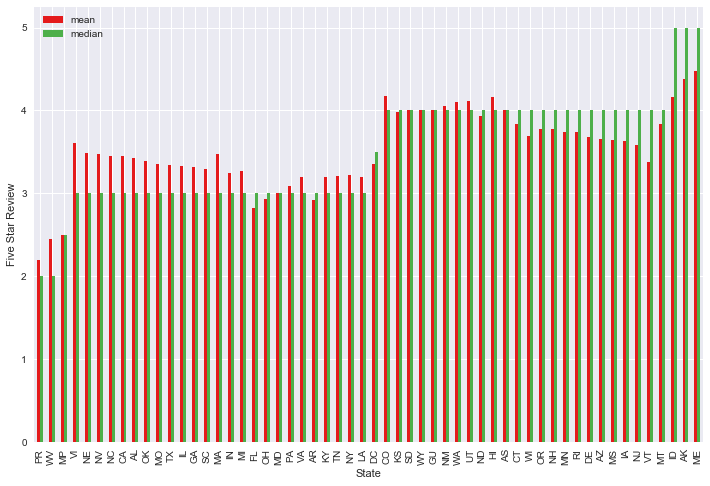

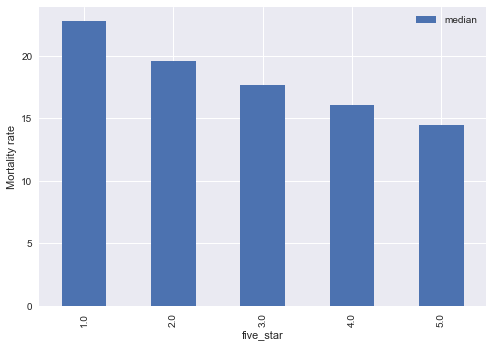

In [13]:
# Subsetting the State based on the mortality_rate
mort_state = total_mortRate.groupby('State',as_index=True)['Mortality_rate'].agg(['mean', 'median'])
mort_state = mort_state.sort_values(by='mean')
mort_state1 = mort_state.sort_values(by='median')
colors = plt.cm.Set2(np.linspace(0,1,5))
mort_state1.plot.bar(figsize=(12,8),color = colors).set_ylabel('Mortality Rate (%)')

# Subsetting the State based on the five_star 
fiveStar_state = total_mortRate.groupby('State',as_index=True)['five_star'].agg(['mean', 'median'])
fiveStar_state = fiveStar_state.sort_values(by='mean')
fiveStar_state1 = fiveStar_state.sort_values(by='median')
colors = plt.cm.Set1(np.linspace(0,1,5))
fiveStar_state1.plot.bar(figsize=(12,8),color = colors).set_ylabel('Five Star Review')

# Exploring the mortality_rate against the five_star reviews

star = total_mortRate.groupby('five_star',as_index=True)['Mortality_rate'].agg(['median'])
star.plot.bar().set_ylabel('Mortality rate')


C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
C:\Users\benbahtin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\Users\benbahtin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set id

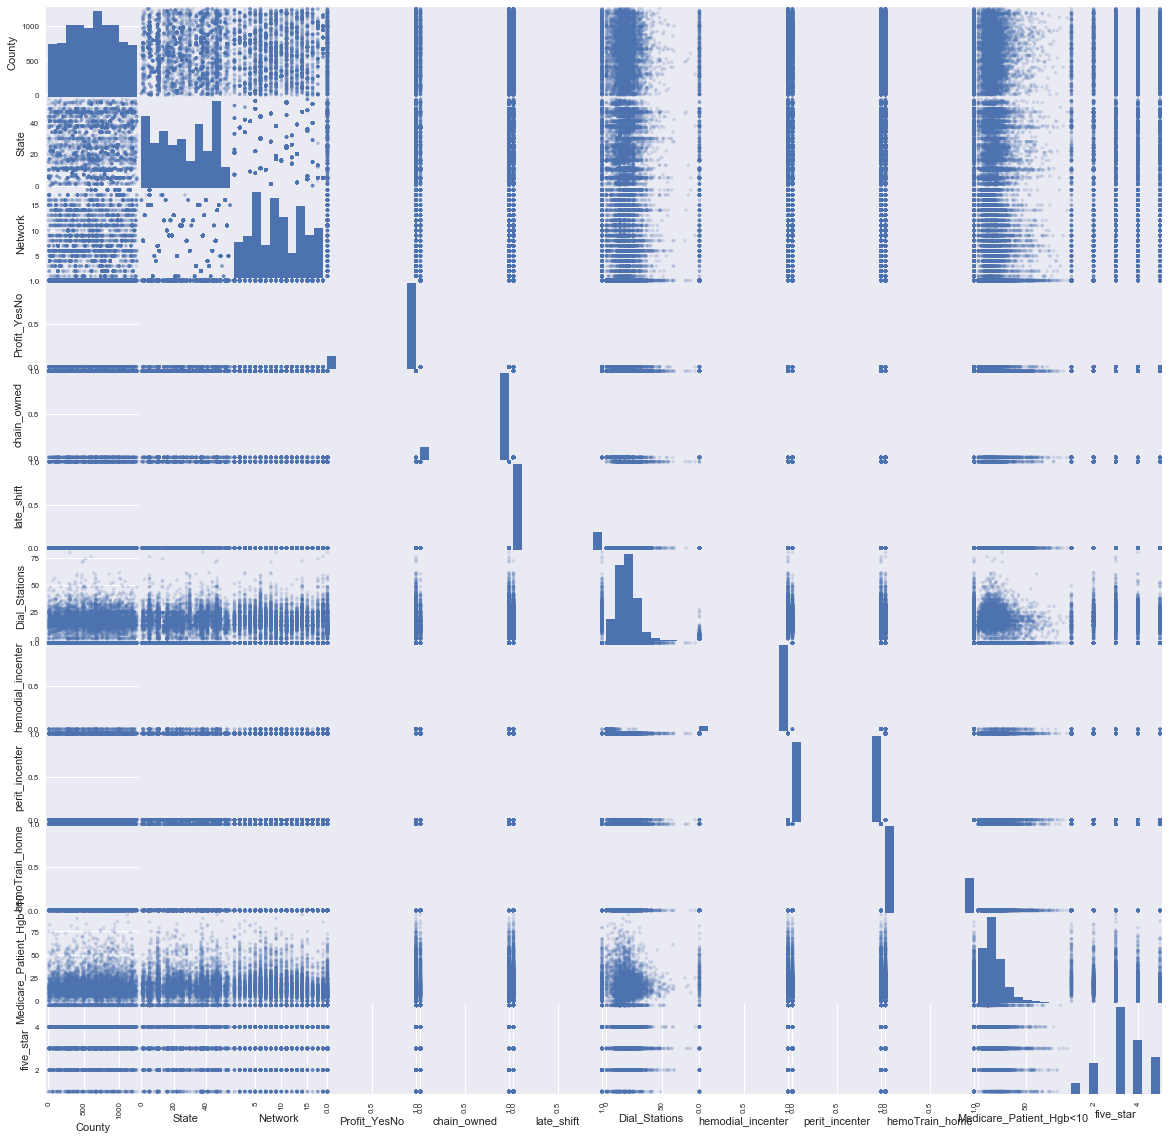

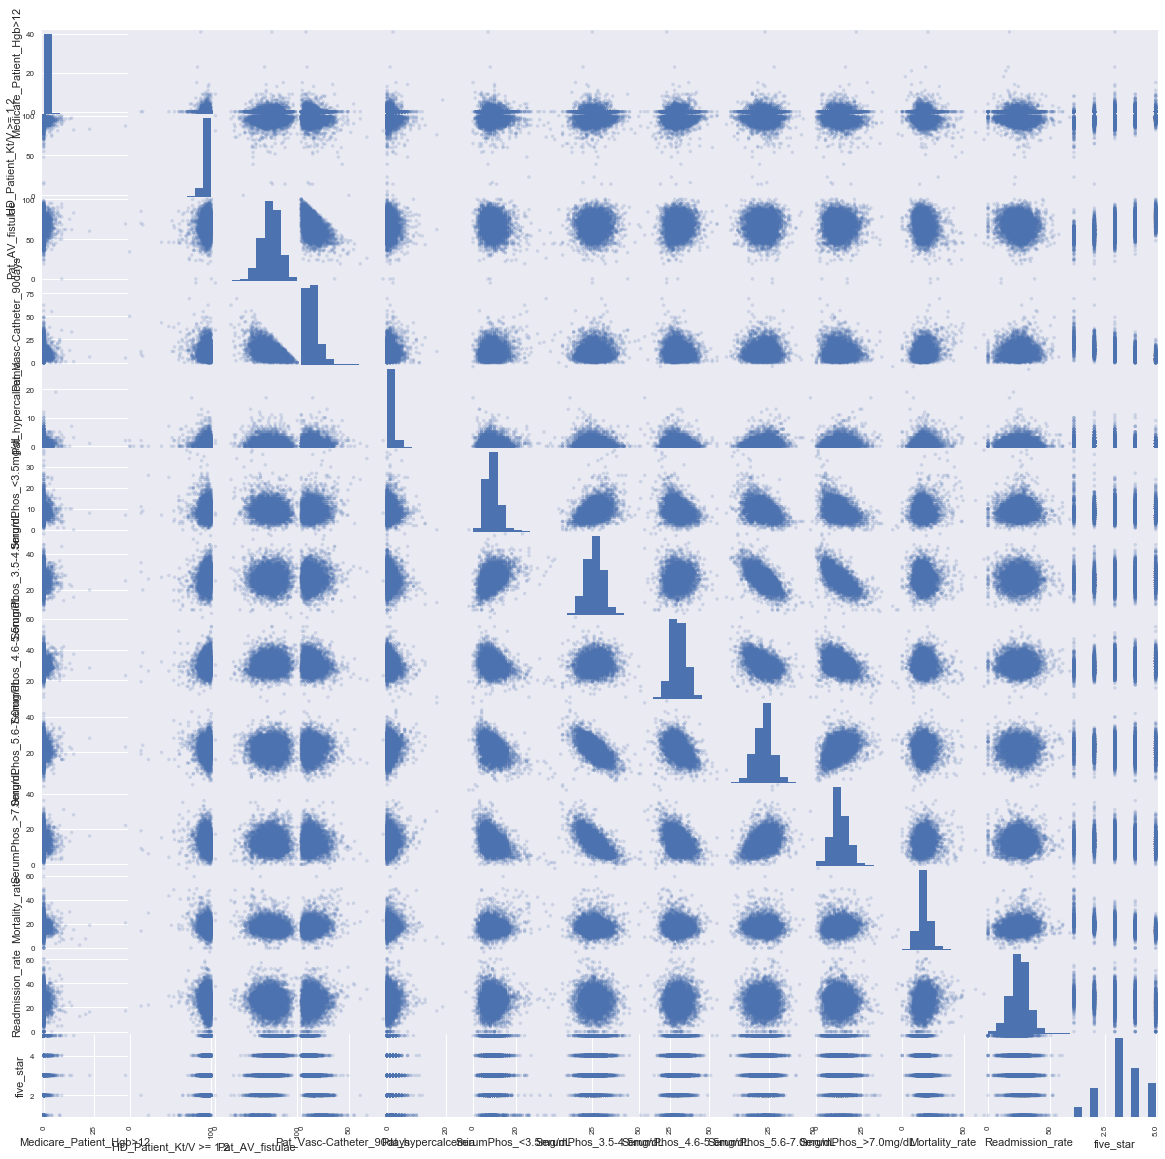

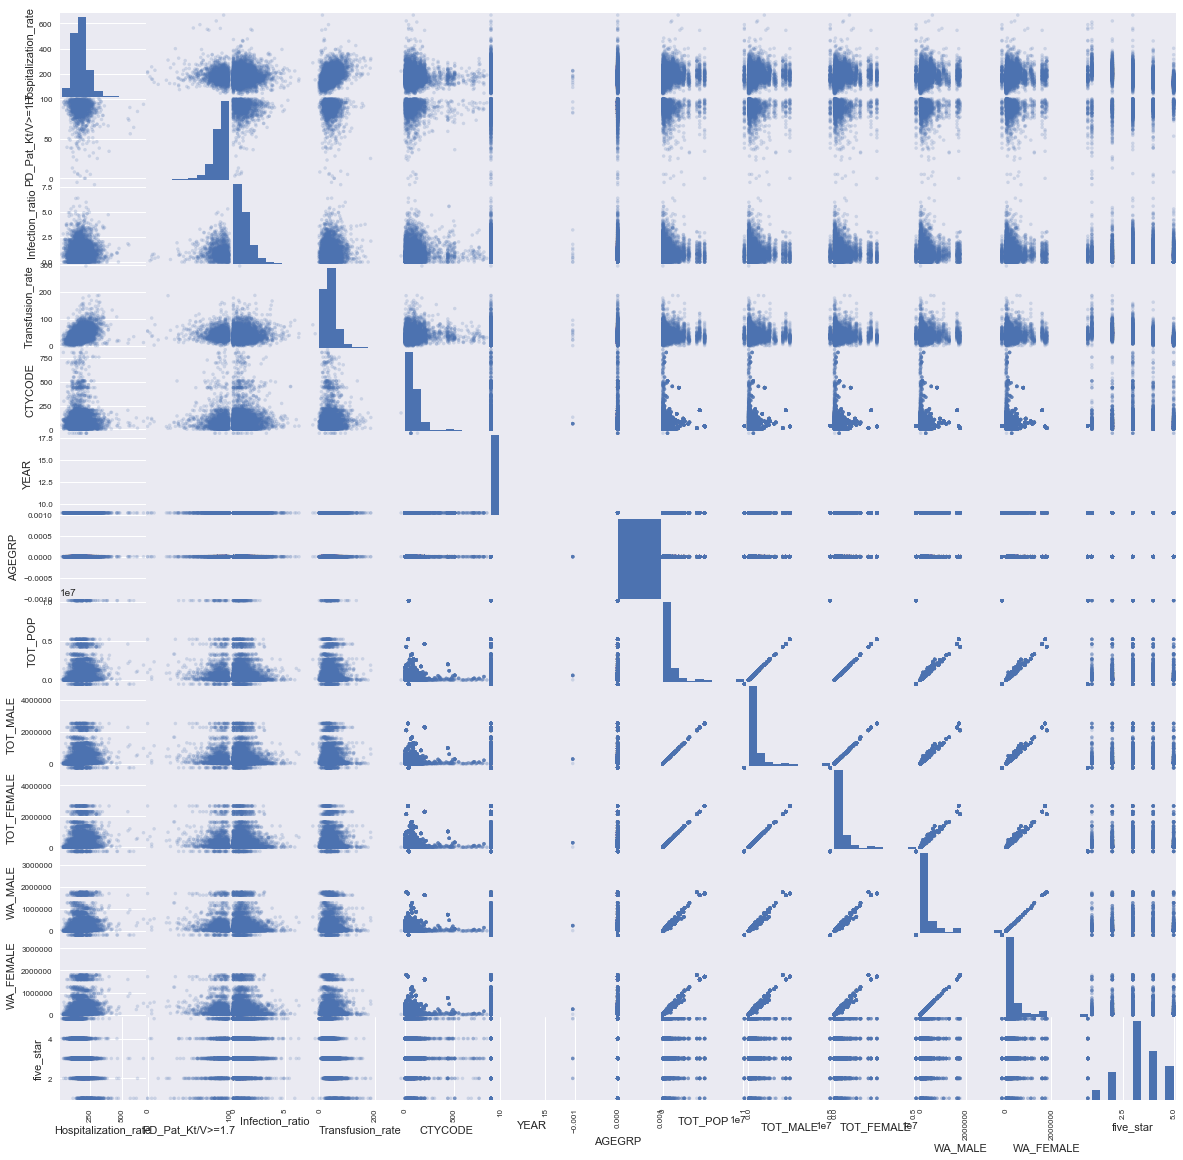

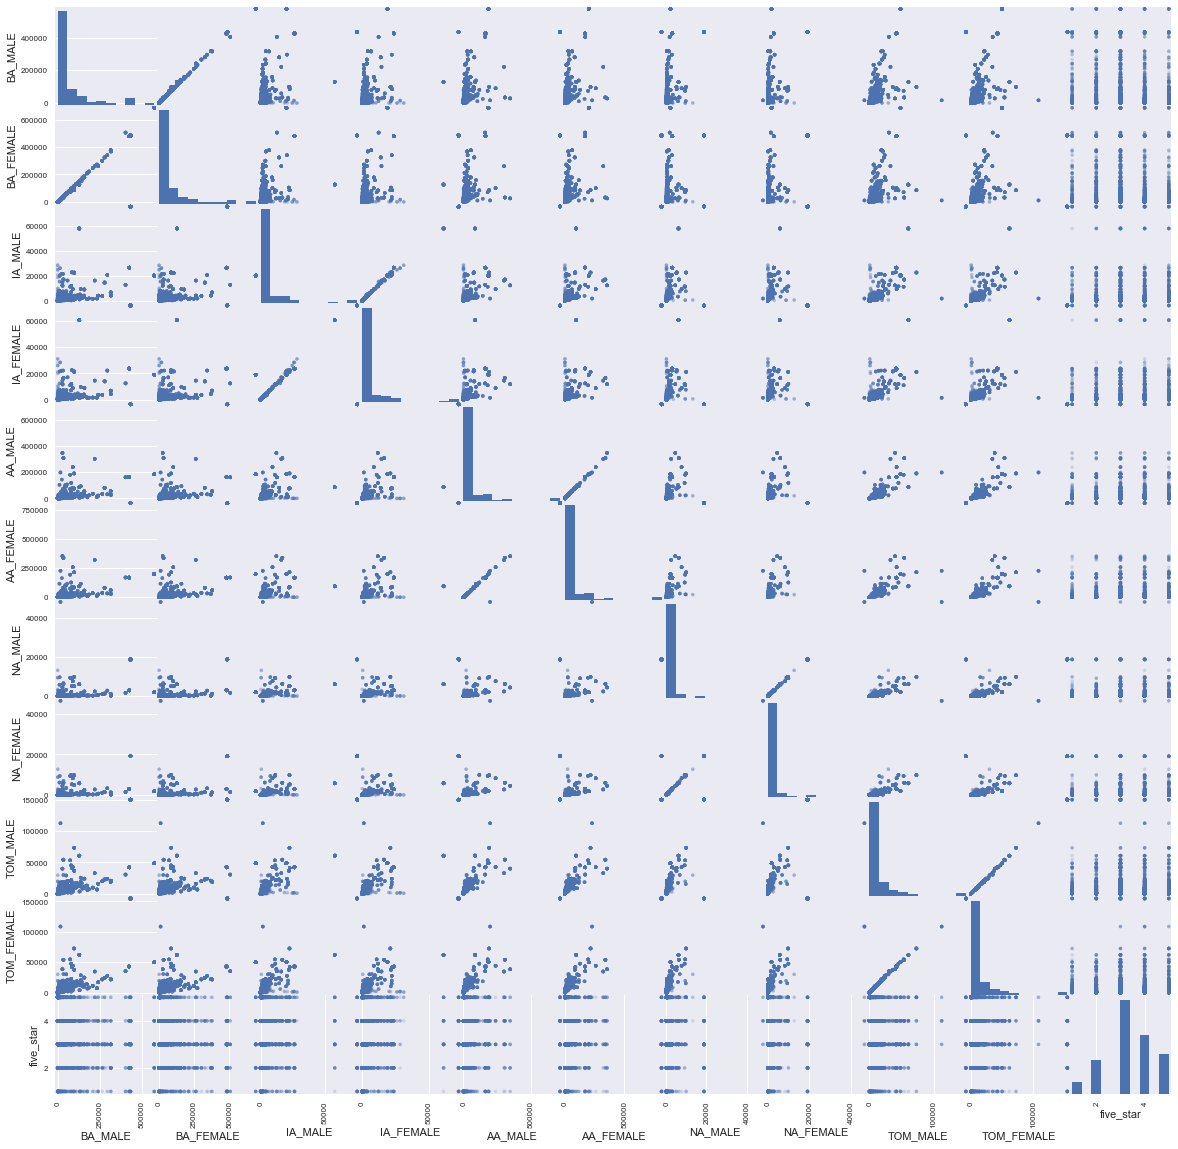

In [14]:
# Comparing the trend of the five_star variable to the other features

total_mortRate['State']=numeric.fit_transform(total_mortRate['State'].astype('str'))
list(total_mortRate).index('five_star')


test1 = total_mortRate.iloc[:, np.r_[1:12,46]]
scatter_matrix(test1, alpha=0.2, figsize=(20, 20), diagonal='hist');

test2 = total_mortRate.iloc[:, np.r_[12:24,46]]
scatter_matrix(test2, alpha=0.2, figsize=(20, 20), diagonal='hist');

test3 = total_mortRate.iloc[:, np.r_[24:36,46]]
scatter_matrix(test3, alpha=0.2, figsize=(20, 20), diagonal='hist');

test4 = total_mortRate.iloc[:, np.r_[36:46,46]]
scatter_matrix(test4, alpha=0.2, figsize=(20, 20), diagonal='hist');

# sns.set(style="whitegrid", color_codes=True)
# sns.regplot(x="five_star", y="Hospitalization_rate", data=total_mortRate);

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


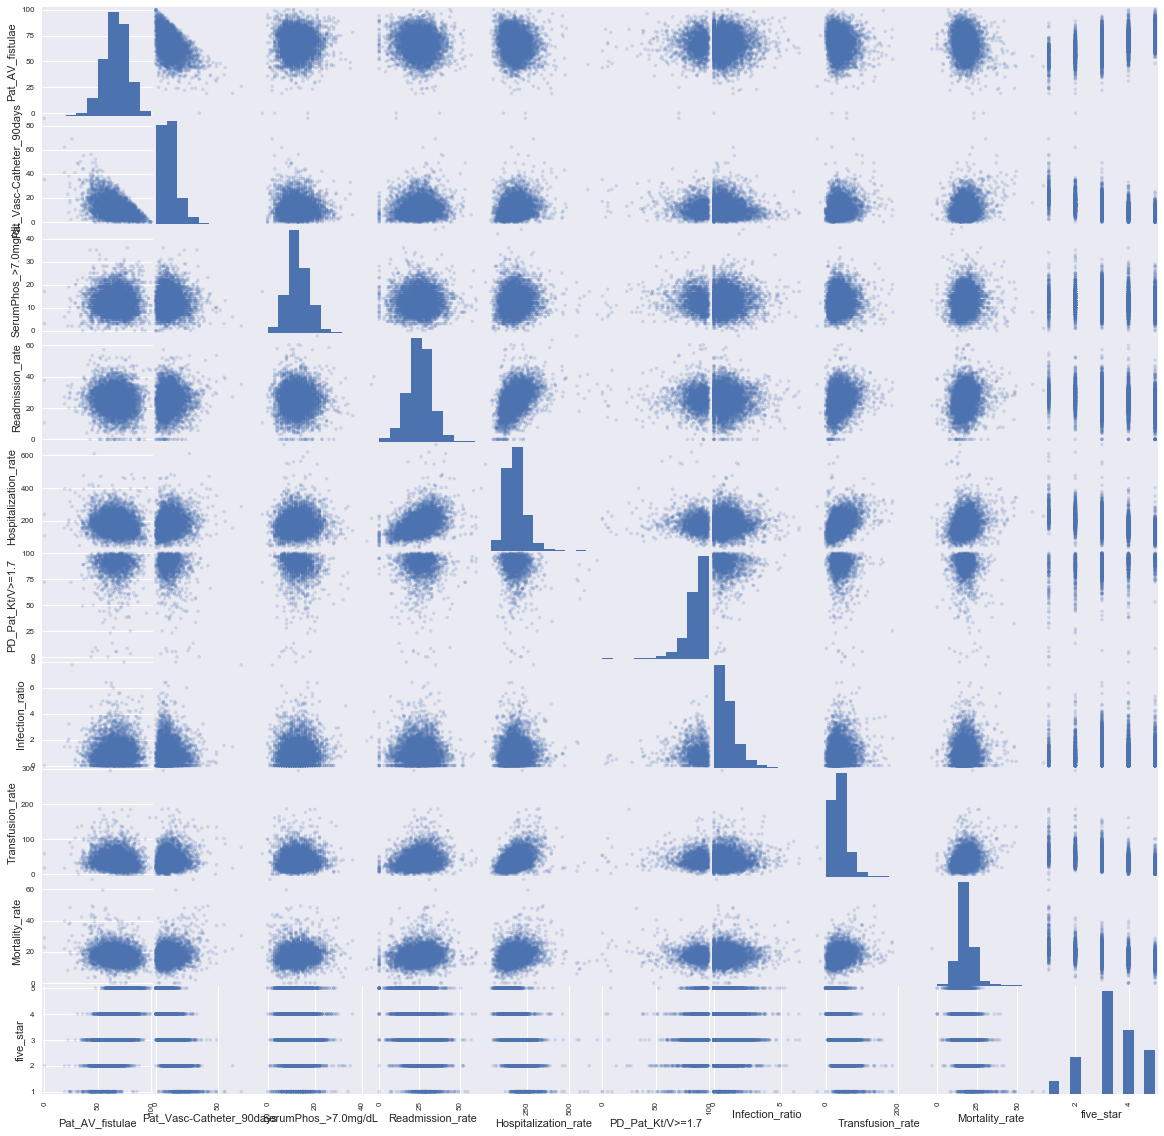

In [15]:
# Ploting the mortality rate against those features which showes some pattern/trend
relate = total_mortRate.iloc[:, [14,15,21,23,24,25,26,27,22,46]]
relate = scatter_matrix(relate, alpha=0.2, figsize=(20, 20), diagonal='hist');

The above plots shows that the trend of the Mortality_rate or five_star varies from one State to another. Both appeared to classify the States into three to four groups. When both are correlated with the other variables, it can be observed some trends which varies from insignificant to very significant. For example, the mortality rate indicates an increasing trend with hospitalization, readmission and tranfusion rates, while infection ratio seem to show not a strong trend with the mortality rate. However, the other features did not seem to show any significant trend against the mortality rate. The relationship between Mortality-rate and five_star is appeared to be negative (see the histogram). The variations observed across the States can indicate that there could be significant pattern in the facilities given the health data of the patients.

In [16]:
# X_col = total_mortRate.columns[1:46]
# bins = np.arange(0, 5, 5)

# # g = sns.FacetGrid(total_mortRate,col="Medicare_Patient_Hgb>12",row="five_star")
# # g.map(plt.hist,'five_star', bins=bins,color='r')


# # # g = sns.PairGrid(total_mortRate,x_vars=X_col, y_vars=["five_star"])
# sns.set(style="ticks", color_codes=True)

# g = sns.pairplot(total_mortRate,y_vars=["five_star"],x_vars=X_col,kind='scatter')
# # g = sns.PairGrid(total_mortRate)
# # g = g.map(plt.scatter)
# g.fig.subplots_adjust(wspace=1, hspace=1)

## Model Fitting

### KMeans clustering

In [17]:
# Loading the necessary libraries
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

C:\Users\benbahtin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
# Selecting the features

X_col = total_mortRate.columns[1:]
features = total_mortRate[X_col]

# Create our imputer to replace missing values with the median 
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp_feature = imp.fit_transform(features)

# # Converting into data frame
# imp_feature=pd.DataFrame(imp_feature)
# imp_feature.head()

# Standarizing the dataset
X_scaled = pd.DataFrame(StandardScaler().fit_transform(imp_feature),columns = X_col)
X_scaled.head()


,County,State,Network,Profit_YesNo,chain_owned,late_shift,Dial_Stations,hemodial_incenter,perit_incenter,hemoTrain_home,...,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,five_star
0,0.566502,0.473291,-1.414124,0.386982,0.378915,-0.456168,-0.873333,0.241402,-1.037105,1.573615,...,-0.514537,-0.373282,-0.382087,-0.333741,-0.323477,-0.306774,-0.307031,-0.369289,-0.374548,-0.299134
1,-0.392229,1.286450,0.932724,0.386982,0.378915,-0.456168,-0.638759,0.241402,0.964223,-0.635480,...,2.693212,1.489349,1.337477,0.963897,0.867062,0.404349,0.386064,1.085537,1.064129,-0.299134
2,0.155617,-0.152216,0.292675,0.386982,0.378915,-0.456168,0.768687,0.241402,-1.037105,-0.635480,...,-0.211621,-0.337119,-0.318925,-0.245813,-0.245196,-0.301747,-0.303008,-0.145847,-0.145821,-0.299134
3,-0.008141,-0.590071,-0.134025,0.386982,0.378915,-0.456168,-0.638759,0.241402,-1.037105,-0.635480,...,-0.135801,-0.341412,-0.338934,-0.347615,-0.341433,-0.312053,-0.298984,-0.350153,-0.350495,-0.299134
4,0.194324,-1.403229,1.146074,0.386982,0.378915,-0.456168,-1.107907,-4.142463,0.964223,1.573615,...,0.278548,3.771088,4.113626,0.332959,0.319502,1.183844,1.105817,1.791137,1.773735,-0.299134


### 1) Splitting training and test dataset

The dataset was randomly split into two groups. K-Means, agglomerative clustering, affinity propagation and DBSCAN were utilized on the first 50% of the dataset. The model with best silhouette score were selected and applied to the rest 50% of the dataset to see the correlation of the results for evaluation purposes.

In [19]:
# Splitting the dataset into two, and later to evaluate the clustering centroids from the two Kmeans clustering results
data_1, data_2= train_test_split(imp_feature, test_size = 0.5, random_state = 1234)

### Training dataset

#### K-Means

In [20]:
# KMeans
k_range = range(2,11)

for i in k_range:
    model = KMeans(n_clusters=i,random_state=1234)
    pred =model.fit_predict(data_1)
    silhouette_avg = silhouette_score(data_1,pred)
    print('The number of clusters, %d, and silhouette coefficient is %0.2f'% (i,silhouette_avg))

The number of clusters, 2, and silhouette coefficient is 0.85
The number of clusters, 3, and silhouette coefficient is 0.79
The number of clusters, 4, and silhouette coefficient is 0.70
The number of clusters, 5, and silhouette coefficient is 0.65
The number of clusters, 6, and silhouette coefficient is 0.62
The number of clusters, 7, and silhouette coefficient is 0.61
The number of clusters, 8, and silhouette coefficient is 0.62
The number of clusters, 9, and silhouette coefficient is 0.62
The number of clusters, 10, and silhouette coefficient is 0.63


#### Agglomerative clustering  

In [21]:
# Agglomerative clustering    
for j in range(2,11):
    c_agg = AgglomerativeClustering(n_clusters=j)
    c_agg.fit_predict(data_1)
    label_2 = c_agg.labels_
    score_1 = silhouette_score(data_1, label_2, metric='euclidean')
    print("The number of clusters, %d, and silhouette coefficient is %0.2f" % (j,score_1))
    

The number of clusters, 2, and silhouette coefficient is 0.88
The number of clusters, 3, and silhouette coefficient is 0.72
The number of clusters, 4, and silhouette coefficient is 0.72
The number of clusters, 5, and silhouette coefficient is 0.57
The number of clusters, 6, and silhouette coefficient is 0.57
The number of clusters, 7, and silhouette coefficient is 0.60
The number of clusters, 8, and silhouette coefficient is 0.60
The number of clusters, 9, and silhouette coefficient is 0.60
The number of clusters, 10, and silhouette coefficient is 0.58


#### Affinity propagation

In [22]:
# Affinity propagation
c_affPro = AffinityPropagation()
c_affPro.fit_predict(data_1)
cluCentInd = c_affPro.cluster_centers_indices_
labels = c_affPro.labels_
print("Silhouette Coefficient: %0.3f"% silhouette_score(data_1, labels, metric='euclidean'))

Silhouette Coefficient: 0.113


C:\Users\benbahtin\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:204: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


In [23]:
# # Spectral clustering

# for k in range(2,11):
#     c_spect = SpectralClustering(n_clusters=k,random_state=1234)
#     c_spect.fit_predict(data_1)
#     label_1 = c_spect.labels_
#     score=silhouette_score(data_1, label_1, metric='euclidean')
#     print("The number of clusters, %d, and silhouette coefficient is %0.2f" % (k,score))

#### DBSCAN

In [24]:
# Using PCA for dimensionality reduction
P= PCA(n_components=6)

# adding the PC1 and PC2 to the exsting data frame
data_1 = pd.DataFrame(data_1)
data_1['x']= P.fit_transform(data_1)[:,0]
data_1['y']= P.fit_transform(data_1)[:,1]

# Applying DBSCAN
A = list(zip(data_1.x,data_1.y))
db = DBSCAN().fit(A)
labels = db.labels_
print("Silhouette Coefficient: %0.3f"% silhouette_score(A, labels))

Silhouette Coefficient: 0.339


Based on the silhouette score, the K-Means and agglomerative clustering yielded better performance with the number of clusters used. Reasonable ( number of cluster range: 5-10) to strong structure ( number of cluster range: 2-4) has been found. However, the DBSCAN and affinity propagation show no substantial to weak structure. As K-Means and agglomerate clustering resulted to almost similar results, one of them, K-Means, with number of clusters of 4 is selected to be utilized on the rest 50% of the data held out. The selection of number of clusters is based on the EDA of five star/mortality rate against the States (see the histograms on EDA section). The States can be categorized into four groups depending on the five star/mortality rate.

### Testing dataset

In [25]:
# applying Kmeans clustering on the rest 20% of the dataset, testing data
k_range_2 = range(2,11)

for k in k_range_2:
    model = KMeans(n_clusters=k,random_state=1234)
    pred_2 =model.fit_predict(data_2)
    silhouette_avg_2 = silhouette_score(data_2,pred_2)
    print('The number of clusters, %d, and silhouette coefficient is %0.2f'% (k,silhouette_avg_2))

The number of clusters, 2, and silhouette coefficient is 0.85
The number of clusters, 3, and silhouette coefficient is 0.80
The number of clusters, 4, and silhouette coefficient is 0.72
The number of clusters, 5, and silhouette coefficient is 0.65
The number of clusters, 6, and silhouette coefficient is 0.61
The number of clusters, 7, and silhouette coefficient is 0.61
The number of clusters, 8, and silhouette coefficient is 0.62
The number of clusters, 9, and silhouette coefficient is 0.62
The number of clusters, 10, and silhouette coefficient is 0.63


### Plotting the clusters for training and testing dataset

In [26]:
# Reducing the number of features (dimentionality reduction for visualization purposes) for both dataset
dim_redu_train =P.fit_transform(data_1)
dim_redu_test =P.fit_transform(data_2)

# adding the PC1 and PC2 to the exsting data frame
data_1 = pd.DataFrame(data_1)
data_1['x1']= P.fit_transform(data_1)[:,0]
data_1['y1']= P.fit_transform(data_1)[:,1]

data_2 = pd.DataFrame(data_2)
data_2['x2']= P.fit_transform(data_2)[:,0]
data_2['y2']= P.fit_transform(data_2)[:,1]

# fit to the kmeans model
km =  KMeans(n_clusters=4)
pred_train = km.fit_predict(dim_redu_train)
pred_test = km.fit_predict(dim_redu_test)

# Adding the cluster values to the dataframe, data_1
data_1['pred_cluster_train']= pred_train
data_2['pred_cluster_test']= pred_test

# converting cluster into str nature for the plotting purposes
data_1['pred_cluster_train'] = data_1['pred_cluster_train'].astype('str')
data_2['pred_cluster_test'] = data_2['pred_cluster_test'].astype('str')

print(pd.DataFrame(list(zip(data_1.pred_cluster_train.value_counts(),data_2.pred_cluster_test.value_counts()))))

      0     1
0  2609  2633
1   521   504
2   198   174
3    77    94


In [27]:
! pip install ggplot
from ggplot import *

C:\Users\benbahtin\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\benbahtin\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\benbahtin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


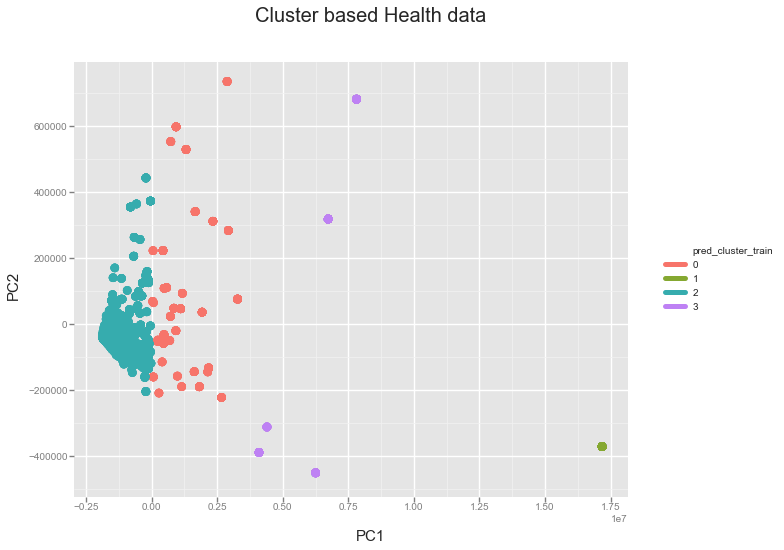

<ggplot: (37390338382)>


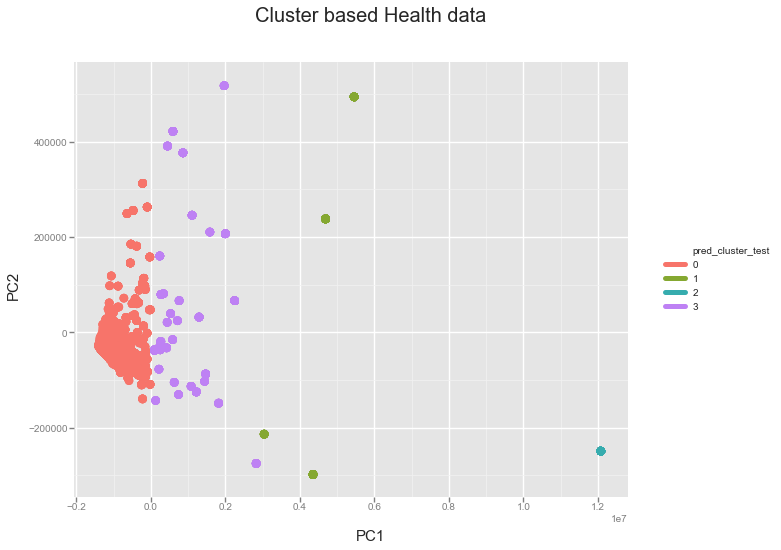

<ggplot: (-9223371999464426594)>

In [28]:
# For the training dataset
a =ggplot(data_1,aes('x1','y1',color='pred_cluster_train')) + geom_point(size=75) + ggtitle(element_text(text='Cluster based Health data', size=20)) + \
       xlab(element_text(size=15, text='PC1')) + ylab(element_text(size=15, text='PC2'))   

# For the testing dataset
b = ggplot(data_2,aes('x2','y2',color='pred_cluster_test')) + geom_point(size=75) + ggtitle(element_text(text='Cluster based Health data', size=20)) + \
       xlab(element_text(size=15, text='PC1')) + ylab(element_text(size=15, text='PC2')) 
print(a)
b